<a href="https://colab.research.google.com/github/harita-gr/AI_ML_Practice/blob/main/ICT_AI_ML_LS_12_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/Mall_Customers.csv")

In [ ]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


one col to encode => gender

In [ ]:
data['CustomerID'].nunique()
# it is a unique id column.

200

In [ ]:
data['Genre'].value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

In [ ]:
data['Genre'] = data['Genre'].map({'Male':1, 'Female': 0})
# encoded. every column are in numerical now.

In [ ]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


Clustering

In [ ]:
x = data[['Genre',	'Age'	,'Annual Income (k$)',	'Spending Score (1-100)']]
# taking every col except unique col to x

In [ ]:
x.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [ ]:
#creating k-means clustering

from sklearn.cluster import KMeans

In [ ]:
# finding optimum value of k by calculating WCSS score from 1 to 10

wcss = []
for i in range(1,11): #i = 1 to 10
  km = KMeans(n_clusters = i, n_init=10, init="k-means++")
  km.fit(x)
  css = km.inertia_ #gives wcss score
  wcss.append(css)

  # disadv - computational cost

In [ ]:
wcss #score keeps decreasing. from 3L to 37k

[308862.06000000006,
 212889.44245524303,
 143391.59236035676,
 104414.67534220168,
 75399.61541401484,
 58350.65449462818,
 51145.004186663005,
 45359.344375356755,
 40639.61634365635,
 37098.35568018133]

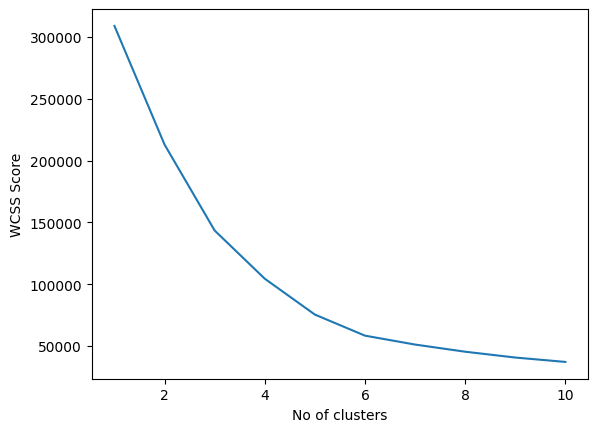

In [ ]:
plt.plot(range(1,11), wcss)
plt.xlabel("No of clusters")
plt.ylabel("WCSS Score")
plt.show()

Optimum no. of clusters = 5

Creating model using this value

In [ ]:
km = KMeans(n_clusters = 5, n_init=10, init="k-means++")

In [ ]:
km.fit(x)

KMeans(n_clusters=5, n_init=10)

In [ ]:
cluster_labels = km.predict(x)

In [ ]:
cluster_labels

array([1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 2,
       1, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 0, 2, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 2, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0], dtype=int32)

In [ ]:
pd.Series(cluster_labels).value_counts() #no. of values in each clusters

2    80
0    39
3    36
1    23
4    22
dtype: int64

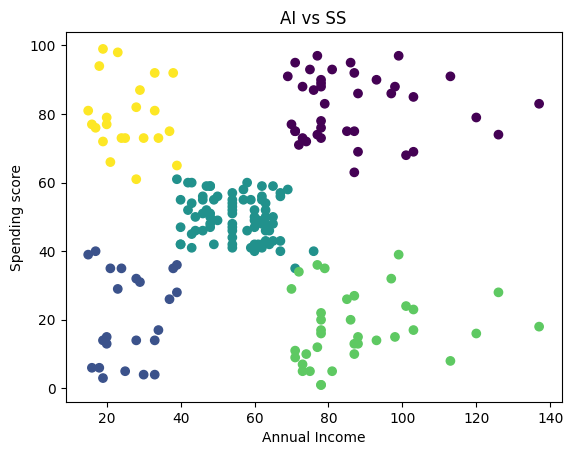

In [ ]:
#plotting cluster wrt spending score & annual income
plt.scatter(x['Annual Income (k$)'], x[	'Spending Score (1-100)'], c=cluster_labels)
plt.xlabel('Annual Income')
plt.ylabel('Spending score')
plt.title('AI vs SS')
plt.show()


blue group - AI is low, SS low

yellow group - AI low, SS high
l.green group - AI is high, SS low (target. give them more offers. INCREASE their SS)

etc.

In [ ]:
data['cluster_labels'] = cluster_labels
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster_labels
0,1,1,19,15,39,1
1,2,1,21,15,81,4
2,3,0,20,16,6,1
3,4,0,23,16,77,4
4,5,0,31,17,40,1


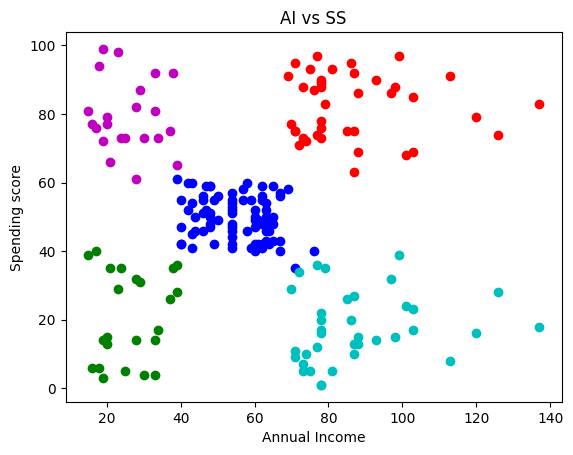

In [ ]:
colors = ['r','g','b','c','m']
for i in range(max(cluster_labels)+1):
  cluster_data = data[cluster_labels == i]
  plt.scatter(cluster_data['Annual Income (k$)'],
            cluster_data[	'Spending Score (1-100)'],
            c=colors[i],
            label =f'Cluster{i}' )
plt.xlabel('Annual Income')
plt.ylabel('Spending score')
plt.title('AI vs SS')
plt.show()

AGGLOMERATIVE HC

In [ ]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster

Ward method for creating many clusters

In [ ]:
mergings = linkage(x, method = 'ward')

Dendrogram to find optimum no. of clusters

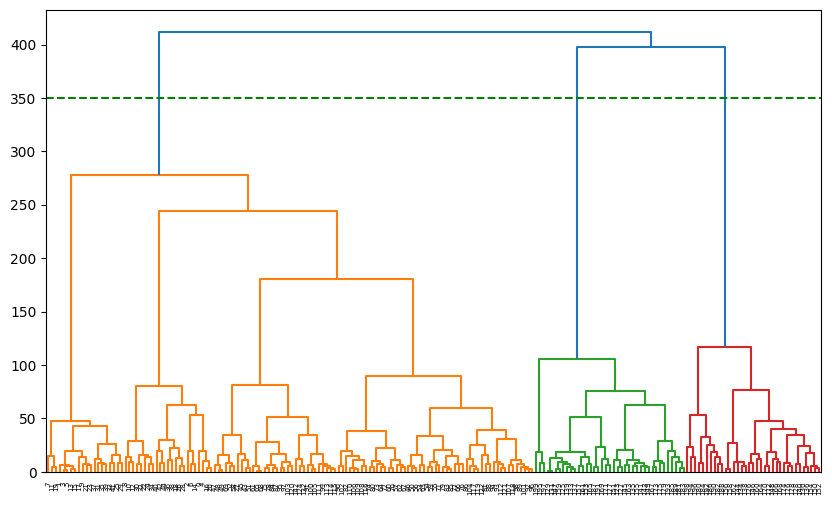

In [ ]:
plt.figure(figsize=(10,6))
dendrogram(mergings)
plt.axhline(350, color='green', linestyle="--") # take any value. 350 is not mandatory.
plt.show()

3 times line is cut. so we need to create 3 clusters

In [ ]:
cluster_labels_hc = fcluster(mergings, 350, criterion = "distance" )

In [ ]:
cluster_labels_hc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 3, 2, 3, 2, 3, 2,
       1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int32)

In [ ]:
#Silhouette Score

from sklearn.metrics import silhouette_score

In [ ]:
sil_score = silhouette_score(x,cluster_labels_hc)

In [ ]:
sil_score

0.3812859576468096

In [ ]:
sil_score = silhouette_score(x,cluster_labels) #k-means
sil_score

0.44482259384548795

not bad. not 0.
So K-means is better